In [1]:
777777777777777777777777777777777777777777777777777777777777777777777777797777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777799# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/model-1/pytorch/default/1/model.pth
/kaggle/input/warpeace/warpeace_input.txt


In [2]:
import torch
import torch.nn.functional as F
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt # for making figures
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from pprint import pprint

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
device

device(type='cuda')

In [5]:
# Specify the file path
file_path = '/kaggle/input/warpeace/warpeace_input.txt'  # Update with your actual file name

# Open and read the contents of the .txt file
with open(file_path, 'r') as file:
    data = file.read()

# Display the content
print(len(data))

3196213


In [6]:
import re

# Define the regular expression to clean each line
def clean_line(line):
    # Modify this regex depending on the type of text/code you're processing
    return re.sub('[^a-zA-Z0-9 \.]', '', line)

# File paths
  # Input text file with special characters
output_file = 'cleaned_text.txt'  # Output file to write cleaned content

# Open the input file and clean each line
with open(file_path, 'r') as file:
    # Open output file to write cleaned lines
    with open(output_file, 'w') as cleaned_file:
        for line in file:
            # Clean the current line using the clean_line function
            cleaned_line = clean_line(line)
            # Write the cleaned line to the new file
            cleaned_file.write(cleaned_line + '\n')

print(f"Text cleaned and saved to {output_file}")


Text cleaned and saved to cleaned_text.txt


In [7]:
with open('cleaned_text.txt', 'r') as file:
    cleaned_data = file.read()
print(len(cleaned_data))
print(cleaned_data[:1000])


3114026
Well Prince so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you if you dont tell me that this means war
if you still try to defend the infamies and horrors perpetrated by that
AntichristI really believe he is AntichristI will have nothing more
to do with you and you are no longer my friend no longer my faithful
slave as you call yourself But how do you do I see I have frightened
yousit down and tell me all the news.

It was in July 1805 and the speaker was the wellknown Anna Pavlovna
Scherer maid of honor and favorite of the Empress Marya Fedorovna. With
these words she greeted Prince Vasili Kuragin a man of high rank and
importance who was the first to arrive at her reception. Anna Pavlovna
had had a cough for some days. She was as she said suffering from la
grippe grippe being then a new word in St. Petersburg used only by the
elite.

All her invitations without exception written in French and delivered
by a scarletliveried footman that morning r

In [8]:
output_file = 'lower_cased_cleaned_text.txt'
with open('cleaned_text.txt', 'r') as file:
    # Open output file to write cleaned lines
    with open(output_file, 'w') as cleaned_file:
        for line in file:
            # Clean the current line using the clean_line function
            cleaned_file.write(line.lower())
            
            

print(f"Text cleaned and saved to {output_file}")

Text cleaned and saved to lower_cased_cleaned_text.txt


In [9]:
with open('lower_cased_cleaned_text.txt', 'r') as file:
    lower_cased_cleaned_data = file.read()
print(len(lower_cased_cleaned_data))
print(lower_cased_cleaned_data[:1000])

3114026
well prince so genoa and lucca are now just family estates of the
buonapartes. but i warn you if you dont tell me that this means war
if you still try to defend the infamies and horrors perpetrated by that
antichristi really believe he is antichristi will have nothing more
to do with you and you are no longer my friend no longer my faithful
slave as you call yourself but how do you do i see i have frightened
yousit down and tell me all the news.

it was in july 1805 and the speaker was the wellknown anna pavlovna
scherer maid of honor and favorite of the empress marya fedorovna. with
these words she greeted prince vasili kuragin a man of high rank and
importance who was the first to arrive at her reception. anna pavlovna
had had a cough for some days. she was as she said suffering from la
grippe grippe being then a new word in st. petersburg used only by the
elite.

all her invitations without exception written in french and delivered
by a scarletliveried footman that morning r

In [10]:
unique_words = set()
lines_dataset = []
with open('lower_cased_cleaned_text.txt', 'r') as file:
    lines = file.readlines()
    lines_dataset = lines
    for line in lines:
        unique_words.update(line.split())
        
print(len(unique_words))
print(len(lines_dataset))

25673
62015


In [11]:
from pprint import pprint

# Assuming 'words' is a list of unique words you obtained from the previous step
words = sorted(list(set(unique_words)))  # unique_words is from the previous processing

# Create mappings for words to integers and vice versa
stoi = {word: i + 1 for i, word in enumerate(words)}  # Word to index mapping
stoi['<PAD>'] = 0  # Optional: Add a padding token if needed
itos = {i: word for word, i in stoi.items()}  # Index to word mapping

# Print the index to word mapping
pprint(len(itos))


25674


In [12]:
import torch

block_size = 5  # context length: how many words do we take to predict the next one?
X, Y = [], []

# Iterate over the words to create input-output pairs
count=0
for w in lines_dataset[:]:
    # Start with a context of empty integers (zeros) corresponding to the <PAD> token
    context = [stoi['<PAD>']] * block_size  # Initialize with <PAD> index
    for word in w.split():  # Split the word into individual words
        ix = stoi[word]  # Get the index of the current word
        X.append(context)  # Append the current context to X
        Y.append(ix)  # Append the index of the current word to Y
        count+=1
        if count<100:
           print(' '.join(itos[i] for i in context), '--->', itos[ix])  # Print the context and prediction
        context = context[1:] + [ix]  # Crop and append the current word index to the context

# Move data to GPU
X = torch.tensor(X).to(device)  # Convert input data to tensor and move to GPU
Y = torch.tensor(Y).to(device)  # Convert output data to tensor and move to GPU


<PAD> <PAD> <PAD> <PAD> <PAD> ---> well
<PAD> <PAD> <PAD> <PAD> well ---> prince
<PAD> <PAD> <PAD> well prince ---> so
<PAD> <PAD> well prince so ---> genoa
<PAD> well prince so genoa ---> and
well prince so genoa and ---> lucca
prince so genoa and lucca ---> are
so genoa and lucca are ---> now
genoa and lucca are now ---> just
and lucca are now just ---> family
lucca are now just family ---> estates
are now just family estates ---> of
now just family estates of ---> the
<PAD> <PAD> <PAD> <PAD> <PAD> ---> buonapartes.
<PAD> <PAD> <PAD> <PAD> buonapartes. ---> but
<PAD> <PAD> <PAD> buonapartes. but ---> i
<PAD> <PAD> buonapartes. but i ---> warn
<PAD> buonapartes. but i warn ---> you
buonapartes. but i warn you ---> if
but i warn you if ---> you
i warn you if you ---> dont
warn you if you dont ---> tell
you if you dont tell ---> me
if you dont tell me ---> that
you dont tell me that ---> this
dont tell me that this ---> means
tell me that this means ---> war
<PAD> <PAD> <PAD> <PAD> <PAD

In [13]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([561438, 5]), torch.int64, torch.Size([561438]), torch.int64)

In [14]:
# Embedding layer for the context

emb_dim = 32
emb = torch.nn.Embedding(len(stoi), emb_dim)

In [15]:
emb.weight

Parameter containing:
tensor([[-0.1784,  1.2820,  0.3038,  ..., -0.8413, -1.1708, -1.5471],
        [ 0.3571, -0.1312, -0.2574,  ...,  0.1109, -0.9571, -2.6325],
        [ 1.2037,  0.1119, -1.0077,  ..., -0.3007,  0.9683, -0.7105],
        ...,
        [ 0.9214,  0.0767, -0.0435,  ...,  0.6531, -0.4648, -0.7310],
        [-0.4380,  0.8587, -0.9739,  ...,  0.5307,  0.5537,  1.9254],
        [-0.2340, -1.2292, -0.0866,  ...,  0.9522, -0.7954,  0.5556]],
       requires_grad=True)

In [16]:
emb.weight.shape

torch.Size([25674, 32])

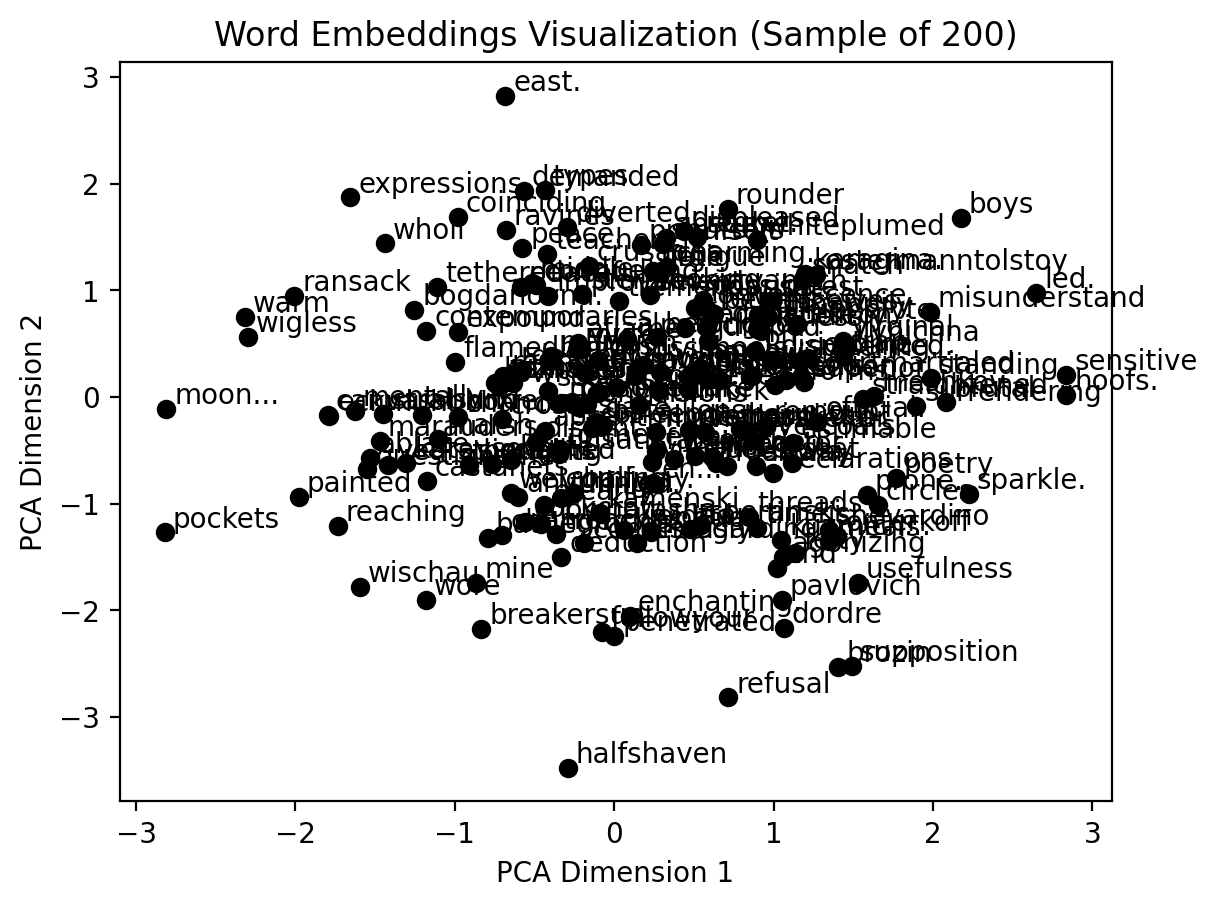

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_emb(emb, itos, ax=None, sample_size=100):
    # Get embeddings as a NumPy array
    embeddings = emb.weight.detach().cpu().numpy()

    # Apply PCA to reduce to 2 dimensions
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)

    if ax is None:
        fig, ax = plt.subplots()

    # Sample some embeddings to plot if the sample_size is set
    if len(itos) > sample_size:
        indices = np.random.choice(len(itos), size=sample_size, replace=False)
    else:
        indices = range(len(itos))

    for i in indices:
        x, y = reduced_embeddings[i]
        ax.scatter(x, y, color='k')
        ax.text(x + 0.05, y + 0.05, itos[i])

    ax.set_xlabel('PCA Dimension 1')
    ax.set_ylabel('PCA Dimension 2')
    ax.set_title(f'Word Embeddings Visualization (Sample of {sample_size})')
    plt.show()

# Example usage with a smaller sample size
plot_emb(emb, itos, sample_size=200)


In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F  # Missing import

# Define the model for word-level generation with hidden layers
class NextWord(nn.Module):
    def __init__(self, block_size, vocab_size, emb_dim, hidden_size=1024):
        super().__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.lin1 = nn.Linear(block_size * emb_dim, hidden_size)
        self.lin2 = nn.Linear(hidden_size, vocab_size)  # Output layer

    def forward(self, x):
        x = self.emb(x)
        x = x.view(x.shape[0], -1)  # Flatten the embeddings
        x = F.relu(self.lin1(x))
        x = self.lin2(x)
        return x

# Define device for computation (CUDA if available, otherwise CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize model
block_size = 5  # Adjust this according to your use case
emb_dim = 64    # Set the embedding dimension

vocab_size = len(stoi)
model = NextWord(block_size, vocab_size, emb_dim).to(device)

g = torch.Generator()
g.manual_seed(4000002)

# Function to generate names based on words
def generate_name_words(model, itos, stoi, block_size, max_len=10):
    context = [0] * block_size  # Start with context filled with zeros (padding)
    name = []
    for i in range(max_len):
        x = torch.tensor(context).view(1, -1).to(device)  # Prepare input for the model
        y_pred = model(x)  # Get predictions
        ix = torch.distributions.categorical.Categorical(logits=y_pred).sample().item()  # Sample from predictions
        word = itos[ix]  # Get the word corresponding to the sampled index
        if word == '<end>':  # Define an end-of-sequence token
            break
        name.append(word)
        context = context[1:] + [ix]  # Update the context by appending the new word index
    return ' '.join(name)  # Join the words to form a name

# Generate names
for i in range(10):
    print(generate_name_words(model, itos, stoi, block_size))


pure. staircase. imprisonment wailing triumphed. sowing lessons. bataillons watering already...
loans. exhausting ancestors butlers faculties begging. vyazmitinov 10 habitually weather...
patriot onerous babe premeditation resembles derogates coffee 30000 essential. eruption.
whit composed. candlestick. militiamen lrusse neck... deck dugout bureau dead
gentlemen irresolution shifts looted.... dread... nonsense... elbow places eugene petit
reigns lurched washed senses zweck lha players. torturing essences shirtlike
obstruct individualsfor screening horseman incompetent eagles picking woolwork persian surnames
deadand retrieving obscurely regimentwas letashovka positive laughter. piquet rascals... malodorous
mulled solidity hang expound granted. jexplique quoits dreamest activitythe devoured
necessary... adjutantgeneral escapefrom lanfrey lose concepts companions. girchik full. tumblers


In [19]:
for param_name, param in model.named_parameters():
    print(param_name, param.shape)

emb.weight torch.Size([25674, 64])
lin1.weight torch.Size([1024, 320])
lin1.bias torch.Size([1024])
lin2.weight torch.Size([25674, 1024])
lin2.bias torch.Size([25674])


In [20]:
# # Train the model

# loss_fn = nn.CrossEntropyLoss()
# opt = torch.optim.AdamW(model.parameters(), lr=0.01)
# # Mini-batch training
# batch_size = 13000
# print_every = 1
# elapsed_time = []
# for epoch in range(500):
#     for i in range(0, X.shape[0]-X.shape[0]%batch_size, batch_size):
#         x = X[i:i+batch_size]
#         y = Y[i:i+batch_size]
#         y_pred = model(x)
#         loss = loss_fn(y_pred, y)
#         loss.backward()
        
#         opt.step()
#         opt.zero_grad()
#     if epoch % print_every == 0:
#         print(epoch, loss.item())

In [23]:
# loss_fn = nn.CrossEntropyLoss()
# opt = torch.optim.AdamW(model.parameters(), lr=0.01)

# # Mini-batch training
# batch_size = 13486
# num_epochs = 250  # You can train for more epochs
# print_every = 1  # Print every 10 mini-batches

# for epoch in range(num_epochs):
#     # Shuffle data at the beginning of each epoch
#     permutation = torch.randperm(len(X))
#     X = X[permutation]
#     Y = Y[permutation]

#     for i in range(0, len(X) - (len(X)%batch_size), batch_size):
#         x = X[i:i + batch_size].to(device)
#         y = Y[i:i + batch_size].to(device)
        
#         # Forward pass
#         y_pred = model(x)
        
#         # Compute loss
#         loss = loss_fn(y_pred, y)
        
#         # Backpropagation
#         loss.backward()
        
#         # Gradient clipping
#         torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
# #         Update weights
#         opt.step()
#         opt.zero_grad()

#         # Print loss periodically
#     if i % print_every == 0:
#             print(f"Epoch [{epoch}], Loss: {loss.item():.4f}")
    
#     # Print loss after each epoch
#     print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

Epoch [0], Loss: 5.6672
Epoch 1/250, Loss: 5.6672
Epoch [1], Loss: 4.8895
Epoch 2/250, Loss: 4.8895
Epoch [2], Loss: 4.3959
Epoch 3/250, Loss: 4.3959
Epoch [3], Loss: 3.9722
Epoch 4/250, Loss: 3.9722
Epoch [4], Loss: 3.6346
Epoch 5/250, Loss: 3.6346
Epoch [5], Loss: 3.3627
Epoch 6/250, Loss: 3.3627
Epoch [6], Loss: 3.1848
Epoch 7/250, Loss: 3.1848
Epoch [7], Loss: 2.9572
Epoch 8/250, Loss: 2.9572
Epoch [8], Loss: 2.8510
Epoch 9/250, Loss: 2.8510
Epoch [9], Loss: 2.6858
Epoch 10/250, Loss: 2.6858
Epoch [10], Loss: 2.5884
Epoch 11/250, Loss: 2.5884
Epoch [11], Loss: 2.5364
Epoch 12/250, Loss: 2.5364
Epoch [12], Loss: 2.3934
Epoch 13/250, Loss: 2.3934
Epoch [13], Loss: 2.3559
Epoch 14/250, Loss: 2.3559
Epoch [14], Loss: 2.2686
Epoch 15/250, Loss: 2.2686
Epoch [15], Loss: 2.1594
Epoch 16/250, Loss: 2.1594
Epoch [16], Loss: 2.1823
Epoch 17/250, Loss: 2.1823
Epoch [17], Loss: 2.1082
Epoch 18/250, Loss: 2.1082
Epoch [18], Loss: 2.0410
Epoch 19/250, Loss: 2.0410
Epoch [19], Loss: 1.9970
Epoch 

In [24]:
import torch

PATH = "model11.pth"  
torch.save({  
    'model_state_dict': model.state_dict(),  

print(f"Model saved to {PATH}")


Model saved to model11.pth


In [23]:

checkpoint = torch.load('/kaggle/input/model-1/pytorch/default/1/model.pth',map_location='cpu')
model.load_state_dict(checkpoint['model_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

model.eval()
# model.train()


/tmp/ipykernel_13/864487609.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('/kaggle/input/model-1/pytorch/default/1/model.pth',map_location='cpu

NextWord(
  (emb): Embedding(25674, 64)
  (lin1): Linear(in_features=320, out_features=1024, bias=True)
  (lin2): Linear(in_features=1024, out_features=25674, bias=True)
)

In [24]:
for i in range(10):
    print(generate_name_words(model, itos, stoi, block_size))

stood in the midst of the outspread line of cossacks
doing justice to our feelings we forget him. that she
still smiling she gracefully moved away turning and glancing at
whether they want rain or fine weather the wind has
protecting a woman and that to protect a woman who
duties of wife and mother upon me i shall try
buonaparte has become a great commander among them hm... had
ma in a white hat now ironically with them look
delight of frenzy. he flung down the slab broke what
could have played such two happy of she said. here


In [26]:
def preprocess_input(input_words, word_to_index):
    # Convert words to indices
    return [word_to_index[word] for word in input_words if word in word_to_index]

# Example input
input_words = ["this", "is", "an", "example","of"]
input_indices = preprocess_input(input_words, stoi)


In [27]:
def predict_next_k_words(model, input_indices, k, index_to_word):
    model.eval()  # Set the model to evaluation mode
    predictions = []
    input_tensor = torch.tensor(input_indices).unsqueeze(0)
    if len(input_tensor)>5:# Add batch dimension
     input_tensor =input_tensor[len(input_tensor)-5:]

    with torch.no_grad():  # No gradients needed for prediction
        for _ in range(k):
            output = model(input_tensor)  # Forward pass
            
            # Print the shape of the output
            print("Output shape:", output.shape)  # Check the shape of the output tensor
            
            # Now let's check the number of dimensions
            predicted_index = torch.argmax(output, dim=1)  # If 2D, we take argmax over the second dimension
            
            predicted_index = torch.argmax(output[:, -1, :], dim=1)  # If 3D, we take argmax over the last dimension
            
            predicted_word = index_to_word[predicted_index.item()]  # Convert index to word
            predictions.append(predicted_word)
            
            # Update input for next prediction (include the new predicted word)
            input_indices.append(predicted_index.item())
            input_tensor = torch.tensor(input_indices[-(len(input_indices)):]).unsqueeze(0)  # Update input tensor

    return predictions


In [28]:

checkpoint = torch.load('/kaggle/input/model-1/pytorch/default/1/model.pth',map_location='cpu')
model.load_state_dict(checkpoint['model_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

# Set the model to evaluation mode if you're only performing inference
model.eval()
# Function to preprocess the input sentence
def preprocess_input(sentence, stoi, block_size):
    sentence = sentence.lower()  # Convert to lowercase
    sentence = re.sub(r'[^a-z\s\.]', '', sentence)  # Remove special characters except full stops
    words = sentence.split()  # Split into words
    words = [word for word in words if word]  # Remove empty strings

    # Create context from the last block_size words
    context = [0] * block_size  # Start with the end-of-sentence token
    for i in range(block_size):
        if i < len(words):
            word = words[i]
            context[i] = stoi.get(word, 0)  # Get the index, use 0 if word not in vocab
        else:
            context[i] = 0  # Fill with end-of-sentence token if fewer words

    return context

# Input sentence
input_sentence = input('input sentence')

# Preprocess the input sentence
context = preprocess_input(input_sentence, stoi, block_size)

# Convert context to tensor and send to device
context_tensor = torch.tensor(context, dtype=torch.long).view(1, -1).to(device)

# Generate the next word
k= int(input('input number of words u have to grenerate'))
predicted_words=[]
for i in range(k):
  with torch.no_grad():  # Disable gradient calculation for inference
    y_pred = model(context_tensor)  # Forward pass
    ix = torch.distributions.categorical.Categorical(logits=y_pred).sample().item()  # Sample from the distribution
    next_word = itos[ix]
    context_tensor = torch.tensor(list(context_tensor[0][1:].numpy()) + [ix], dtype=torch.long).view(1, -1).to(device) 
    predicted_words.append(next_word)  
print(f"The predicted next word for the input '{input_sentence}' is: '{' '.join(predicted_words)}'")

# import streamlit as st
# st.title("Next Word Prediction App")
# input_text = st.text_input("Enter initial text for prediction:", "I want to have")
# context_length = st.selectbox("Context Length", [5,10])
# embedding_dim = st.selectbox("Embedding Dimension", [8,64,256])
# hidden_size = st.selectbox("Hidden Size", [1024,2048])
# activation_func_name = st.selectbox("Activation Function", ["ReLU", "Tanh"])
# max_len = st.selectbox("Number of words to predict", [1,5])
# random_seed = st.number_input("Random Seed", min_value=0, max_value=100, value=42)
# if st.button("Generate Text"):
#     generated_text = generate_text(model, itos, stoi, context_length, input_text, max_len=num_words, device='cpu')
#     st.write("Generated text:", input_text + " " + generated_text)

# !streamlit run /opt/conda/lib/python3.10/site-packages/ipykernel_launcher.py

/tmp/ipykernel_13/3012485167.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('/kaggle/input/model-1/pytorch/default/1/model.pth',map_location='cp

input sentence we
input number of words u have to grenerate 2


The predicted next word for the input 'we' is: 'here in'


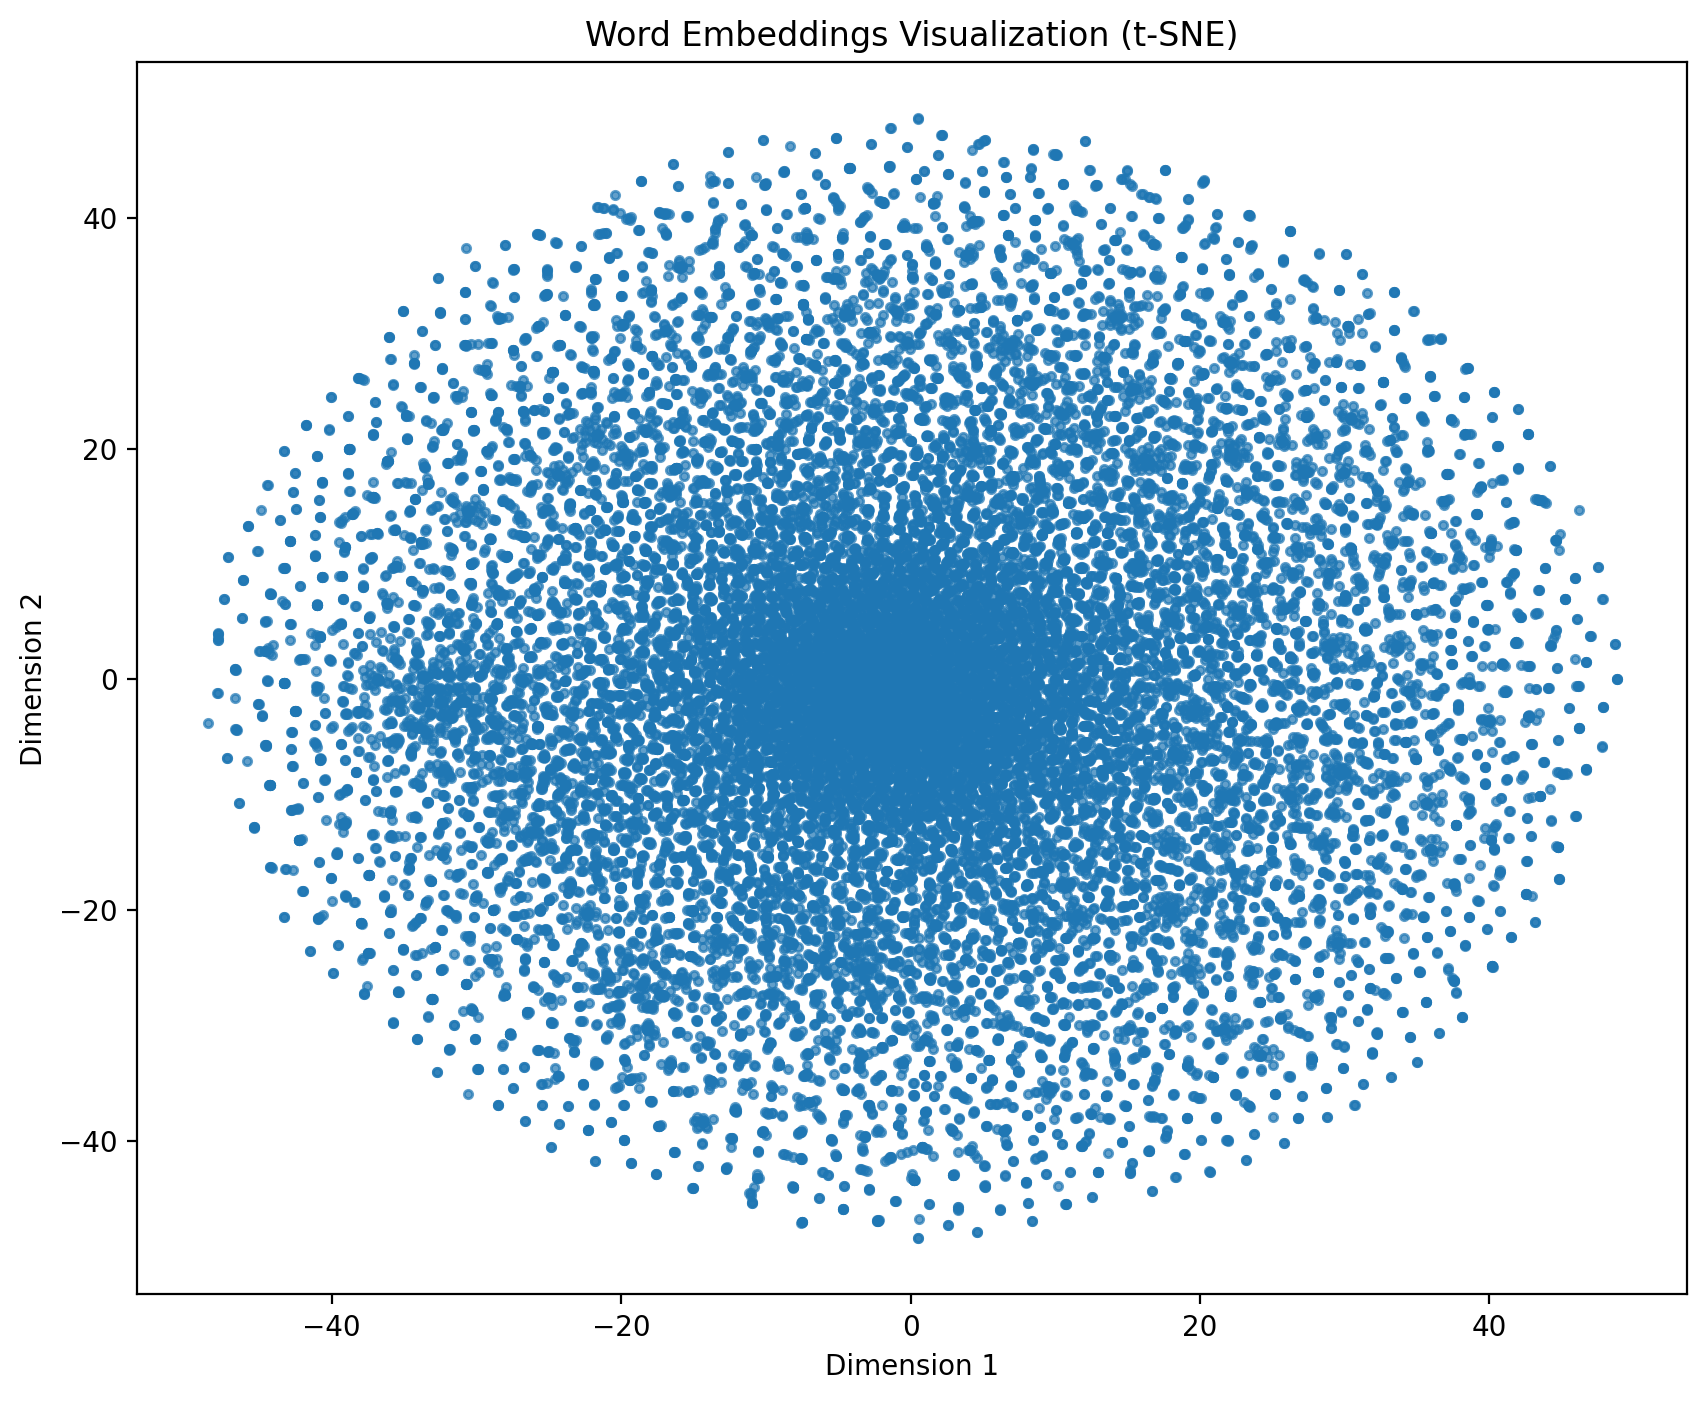

In [29]:
from sklearn.manifold import TSNE
word_indices = torch.arange(vocab_size)
embeddings = model.emb(word_indices).detach().numpy()

# Check if t-SNE is needed
if emb_dim > 2:
    tsne = TSNE(n_components=2, random_state=0)
    embeddings_2d = tsne.fit_transform(embeddings)
else:
    embeddings_2d = embeddings  # Use embeddings directly if 2-dimensional

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.7, marker='.')
plt.title("Word Embeddings Visualization (t-SNE)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()